# Исследование объявлений о продаже квартир

**Описание проекта**

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**ЦЕЛЬ**

- Выявить какие факторы и как влияют на продажу квартир.

В ходе работы мы подгрузим данные. Изучим общую информацию о полученном датафрейме. Изучим типы данных, отредактируем при необходимости. Выполним предобрабртку данных. Почистим от дубликатов. Найдем пропуски и обработаем их. Посторим гистограммы и прочие графики визуализируещие данные. Проанализируем какие факторы влияют на продажи меньше или сильнее.

Наметим план.

**ПЛАН**

1. Обзор данных.
2. Предобработка данных.
4. Исследовательский анализ.
5. Общий вывод.


## Обзор данных.


In [1]:
#Подгружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
df = pd.read_csv('/Users/mariaspartalan/Desktop/готовые проекты/1 яндекс.недвижимость/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Данные выгружены корректно. В них содержится инфорация о 23699 объектах недвижимости. 

Информация представленная в 22 столбцах:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

  По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных, как то parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, airports_nearest, cityCenters_nearest.

На этом шаге обнаружены несоотвествие заявленным данным и типам представленым в таблице:
- first_day_exposition тип object, заменим на дату
- is_apartment, заявлен булев тип, в таблице object, далее рассмотрим с чем это может быть связано
- floors_total, balcony, days_exposition, parks_around3000, ponds_around3000, заменим целочисленный

  Также в данных выялены пропуски рассмотрим конкретнее где и сколько.
  

In [5]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Больше всего пропусков в данных 'is_apartment'. Так же ранее мы выявили там ошибку формата, возможно это взаимосвязано. Рассмотрим далее.

Пропуски в данных о days_exposition сязан ы тем, что объявление скорее всего еще активно. Эти пропуски оставим без изменений.

  Одинаковое количество пропусков в информации о parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, airports_nearest, cityCenters_nearest. Это как раз пул данных за который отвечает автоматическая выгрузка картографических данных.

  Так же пропуски есть в:

- balcony
- ceiling_height
- kitchen_area

Далее рассмотрим подробнее.

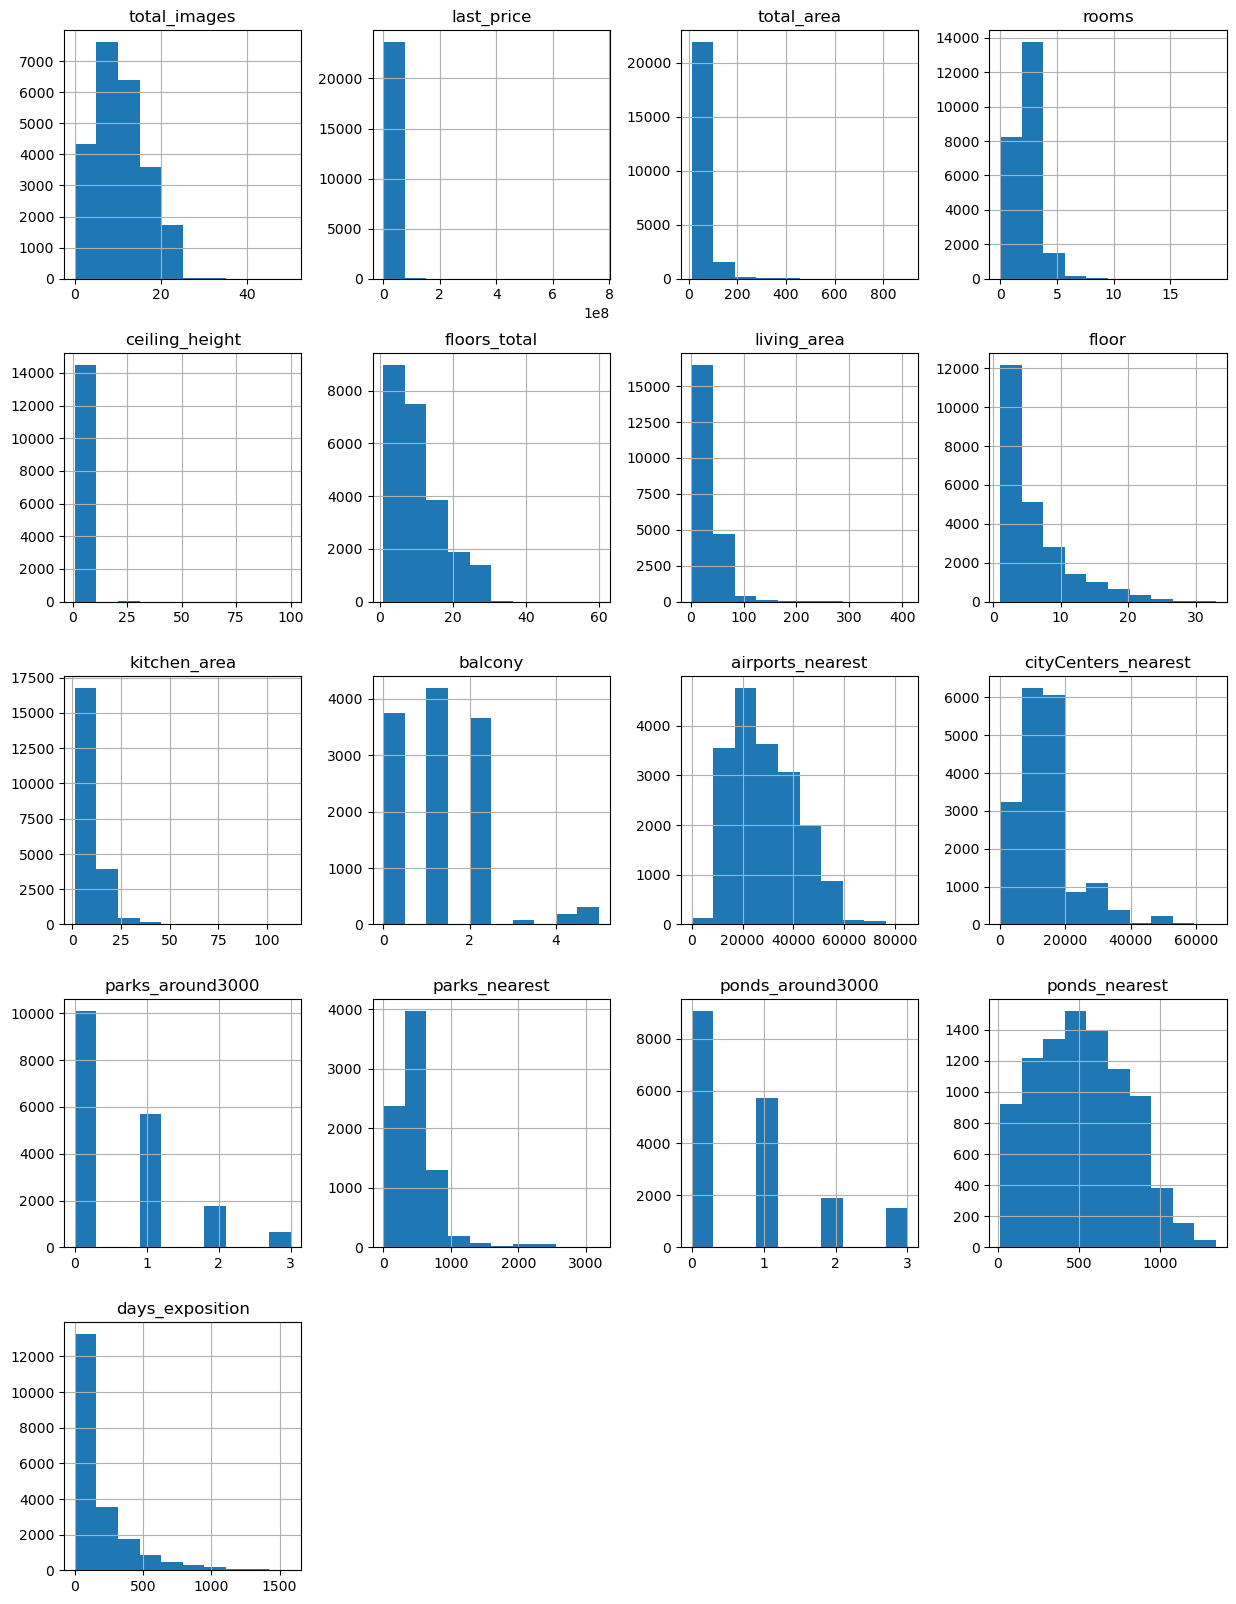

In [4]:

df.hist(figsize=(15, 20))

plt.show()

Данные с выгруженными картографическими парметрами выглядят нормально. По остальным имеются выбросы в дальнейше ознакомися с ними подробнее. 

**Промежуточный вывод:**

В файле содержится информация о 23 699 обектах.

После первичного осмотра, сделаем декомпозицию цели:

1) Обработаем пропуски в столбцах. 
   
2) Изменим тип данных в некоторых столбцах.

Из данных представленных таблице, можно сделать вывод, что пропуски в данных вызваны постановкой вопроса. 
То есть, "явлется ли квартира из объяления апартаментам?". В случае нет, люди могли оставить эту графу без ответа. Поменяем значение на булево, true/false.

Так изменим формат в графе с количеством этажей на числовой.

3) Немного подкорректируем столбец с ценой. 
Сложно рассматривать таблицу с числами такого порядка. Заменим рубли на тысячи.

4) Удалим неявные дубликаты из графы с указанием геграфического наименования. Затем проанализируем таблицу на наличие дубликатов в целом.

5) Уберем выбросы редкие значения из граф общая площадь, жилая площадь, цена.

6) Добавим новые столбцы с необходимой для анализа информацией.

* цена за квадратный метр;
* день недели публикации объявления (0-понедельник, 1-вторни и т.д.);
* месяц публикации объявления;
* год;
* тип этажа квартиры (значения "первый", "последний", "другой");
* расстояние доцентра в километрах.


## Предобработка данных.

[К содержанию](#2.)
### Работа с пропусками.

**is_apartment**

Рассмотрим значения в данных об аппартаментах.

In [5]:
print('Уникальные значения в данных об аппартаментах:', df['is_apartment'].unique())
print('Уникальные значения в данных о балконах', df['balcony'].unique())

Уникальные значения в данных об аппартаментах: [nan False True]
Уникальные значения в данных о балконах [nan  2.  0.  1.  5.  4.  3.]


Как и предполагалась это столбец с булевыми данными, пропуск скорее всего связан с постановкой вопроса. МНогие люди, выкладывающие объявления о недвижимости, которая не является аппртаментами, просто пропускали эту графу и потому. Заменим пропуски на False.


In [6]:
#Заменим пропуски на False
df['is_apartment'] = df['is_apartment'].fillna(False)

/var/folders/rh/m635vnx9069_1y61mcn7n51h0000gn/T/ipykernel_65704/4030628633.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_apartment'] = df['is_apartment'].fillna(False)


**balcony**

In [7]:
print('Уникальные значения в данных о балконах', df['balcony'].unique())

Уникальные значения в данных о балконах [nan  2.  0.  1.  5.  4.  3.]


Пропуски в графе о наличии балконов, скорее всего, связаны с их отсутвием. Заменим на 0

In [8]:
#Меняем пропуски на 0, изменяем формат числа
df['balcony'] = df['balcony'].fillna(0)

**ceiling_height**

Ознакомимся со значениями в графе с информацией о высоте потолков, "ceiling_height".

In [9]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [10]:
#рассмотрим уникальные значения столбца
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Высота потолка 100. Сомнительно

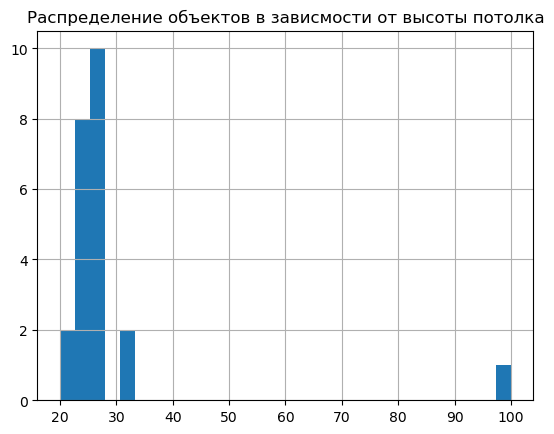

In [11]:
df['ceiling_height'].hist(bins=30, range = (20, 100))
plt.title('Распределение объектов в зависмости от высоты потолка')
plt.show()

Рассмотрим 20 максимальных уникальных занчений, так как в этом месте подозрительно много обьектов, для выброса. и 5 минимальных.

In [12]:
print('Максимальные значения высоты потолка')
print(df['ceiling_height'].sort_values(ascending=False).head(20))
print('=====================')
print('Минимальные значения высоты потолка')
print(df['ceiling_height'].sort_values().head(5))

Максимальные значения высоты потолка
22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
355       25.0
6246      25.0
14382     25.0
4643      25.0
9379      25.0
Name: ceiling_height, dtype: float64
Минимальные значения высоты потолка
22590    1.00
5712     1.20
16934    1.75
2572     2.00
19329    2.00
Name: ceiling_height, dtype: float64


Eсть слишком большие значения.
Возможно в части из них, в которых высота от 20 и выше, клиенты при размещении обьявления ошиблись в запятой.
Поправим эти значения.

Так же, согласно внешним источникам: 

Сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра.
В старом фонде высота потолка может достигать 4-5 м.

Потому исключим строки со значениями до 2,4 м и свыше 5. 

Пропуски в данных заполним средним (так как выбросы уже удалили) значением.

In [13]:
#меняем значения больше 20
df.loc[df['ceiling_height'] > 20, ['ceiling_height']] = df.loc[df['ceiling_height'] > 20, 'ceiling_height'] / 10
#Заменяем пропуски на медианнные значения
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())
#исключаем из данных строки, со значением больше 5
df = df.query('2 < ceiling_height < 5')

**kitchen_area**

In [14]:
print(f"В kitchen_area {df['kitchen_area'].isna().sum()} пропусков. Они состаляют {round(df['kitchen_area'].isna().sum()/len(df)*100)}%")

В kitchen_area 2270 пропусков. Они состаляют 10%


Рассотрим, что это за данные, есть гипотеза, что это квартиры-студии, или свободные планировки.

In [15]:
df_no_kitch = df[df['kitchen_area'].isna()]
print('Квартиры студии, варианты значения:', df_no_kitch['studio'].unique())
print('Свободные планировки, варианты значения:', df_no_kitch['open_plan'].unique())

Квартиры студии, варианты значения: [False  True]
Свободные планировки, варианты значения: [False  True]


Гипотеза не подтверждена

Остается заполнить медианным значением.

In [16]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

**cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest**      

Здесь на лицо ошибка выгрузки картографических данных. Инфорацию об этой ошибке, неообходио передать разработчикам. 

In [17]:
(
    df[['cityCenters_nearest', 'parks_around3000', 'parks_nearest', 
        'ponds_around3000', 'ponds_nearest']]
    .isna().sum()
)

cityCenters_nearest     5508
parks_around3000        5507
parks_nearest          15603
ponds_around3000        5507
ponds_nearest          14572
dtype: int64

В parks_nearest  и ponds_nearest пропусков больше. Так как это данные о близости к водоемам и паркам. Возможно пропуски здесь говорят нам о том, что их нет поблизости.

Рассмотрим значения о наличии оных в тех объектах, где есть пропуски.

In [18]:
print('Данные расстоянии до парка в строках где есть пропуски бывают таких видов: ', df[df['parks_nearest'].isna()]['parks_around3000'].unique())
print('')
print('Данные расстоянии до водоемов в строках где есть пропуски бывают таких видов: ', df[df['ponds_nearest'].isna()]['ponds_around3000'].unique())

Данные расстоянии до парка в строках где есть пропуски бывают таких видов:  [ 0. nan]

Данные расстоянии до водоемов в строках где есть пропуски бывают таких видов:  [ 0. nan]


Наша гипотеза подтвердилась. Заполнить эти пропуски че то вроде "отсутсвуют" мы не можем, так как это приведет к изменению типа данных.   

Просчитаем, все чтобы видеть картину яснее.

In [19]:
print(f"Количество квартир без парков поблизости: {len(df.query('parks_around3000 == 0'))}. Пропусков из-за ошибки:\
{df['parks_nearest'].isna().sum() - len(df.query('parks_around3000 == 0'))}")
print(f"Количество квартир без прудов поблизости:{len(df.query('ponds_around3000 == 0'))}. Пропусков из-за ошибки:\
{df['ponds_nearest'].isna().sum() - len(df.query('ponds_around3000 == 0'))}")

Количество квартир без парков поблизости: 10100. Пропусков из-за ошибки:5503
Количество квартир без прудов поблизости:9065. Пропусков из-за ошибки:5507


Итого, можно сделать вывод о том, что картографические данные о 5507 объектах выгружены некорректно.

**airports_nearest**

Пропуски в информации о близости к аэропорту скорее всего связаны все с той же ошибкой.

Можно попробовать сократить их количество по объявлениям из ЛО. 
Так как города в ЛО небольшие, мы посчитаем медианное расстояние до аэропорта из каждого. Затем заполним этими данными пропуски в соотвествии с названием.

In [20]:
print(f"В airports_nearest {df['airports_nearest'].isna().sum()} пропусков")

В airports_nearest 5531 пропусков


In [21]:
#Считаем медианное расстояние до центра
airport_med = df.pivot_table(index='locality_name', values='airports_nearest', aggfunc='median')

In [22]:
#Добавляем таблицу с медианными значениями в исходный датафрейм
df = df.merge(airport_med, on = 'locality_name', how='left')
#Заполняем пропуски и удаляем лишние столбцы
df['airports_nearest'] = df['airports_nearest_x'].fillna(df['airports_nearest_y'])
df = df.drop(['airports_nearest_x', 'airports_nearest_y'], axis=1)      
print('Теперь пропусков стало', df['airports_nearest'].isna().sum() )      

Теперь пропусков стало 5383


До трансфораций пропусков было 5531, стало 5383. Это чуть лучше. Для более точной картины лучше дождаться обновленных картографических данных.

**living_area**

Рассмотрим данные внимательнее.



In [23]:
print(f"В living_area {df['living_area'].isna().sum()} пропусков. Они состаляют {round(df['living_area'].isna().sum()/len(df)*100)}%")

В living_area 1898 пропусков. Они состаляют 8%


Пожертвуем этими данными и удалим.

In [24]:
df = df.dropna(subset='living_area')

**floors_total**

In [25]:
print(f"В floors_total {df['floors_total'].isna().sum()} пропусков. Они состаляют {round(df['floors_total'].isna().sum()/len(df)*100)}%")

В floors_total 53 пропусков. Они состаляют 0%


Без сомнения мы може их удалить.

In [26]:
df = df.dropna(subset='floors_total')

### Тип данных

Поправим числовой формат в данных о floors_total, balcony.

In [27]:
cols = ['floors_total', 'balcony']
for c in cols:
    df[c] = df[c].astype('int')

# Проверим результат
print(df['floors_total'].dtype)
print(df['balcony'].dtype)

int64
int64


### Единицы измерения

In [28]:
#Меняем порядок в графе цена
df['last_price'] = (df[df['last_price'].notnull()]['last_price'] / 1000 * 1.0).round().astype(int)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest
0,20,13000,108.0,2019-03-07T00:00:00,3,2.700000,16,51.0,8,False,...,25.0,0,Санкт-Петербург,16028.0,1.0,482.0,2.0,755.0,NaN,18863.0
1,7,3350,40.4,2018-12-04T00:00:00,1,2.730849,11,18.6,1,False,...,11.0,2,посёлок Шушары,18603.0,0.0,NaN,0.0,NaN,81.0,12817.0
2,10,5196,56.0,2015-08-20T00:00:00,2,2.730849,5,34.3,4,False,...,8.3,0,Санкт-Петербург,13933.0,1.0,90.0,2.0,574.0,558.0,21741.0
4,2,10000,100.0,2018-06-19T00:00:00,2,3.030000,14,32.0,13,False,...,41.0,0,Санкт-Петербург,8098.0,2.0,112.0,1.0,48.0,121.0,31856.0
5,10,2890,30.4,2018-09-10T00:00:00,1,2.730849,12,14.4,5,False,...,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,55.0,NaN


### Выявление дубликатов

Рассмотрим из каких населнных пунктов квартиры указанные в обьявлениях.


In [29]:
df['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

In [30]:
print(len(df['locality_name'].unique()), 'уникальных наименований местности')

349 уникальных наименований местности


Переведем все варианты в нижний регистр.

Есть пропуски данных. Их немного. Возможно связано, с невнимательностью заполняющего.
Заменим на "нет данных".

Имеюся неявные дубликаты. Например: 'посёлок Мурино' и 'поселок Мурино', удалим лишние слова. Оставим непосредственно географические наименования.

In [31]:
#Заменим пропуски на 'нет данных' и переведем все названия в строчный регистр
df['locality_name'] = df['locality_name'].fillna('нет данных').str.lower()
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок') 

In [32]:
print(f"Теперь стало {len(df['locality_name'].unique())} уникальных наименований местности")

Теперь стало 315 уникальных наименований местности


In [33]:
print(f" В данных имеется {df.duplicated().sum()} дубликатов")

 В данных имеется 0 дубликатов


### Работа с выбросами

Для чистоты статистики исключим выбивающиеся значение по таким показателям как, общая площадь, жилая площадь и цена. Ознакомимся с этими данными:

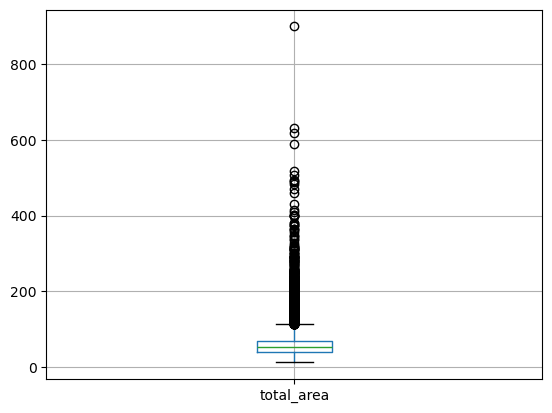

count    21718.000000
mean        60.052962
std         34.610935
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64


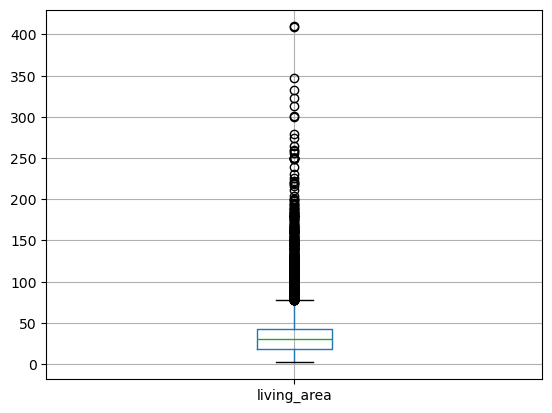

count    21718.000000
mean        34.447304
std         21.986372
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


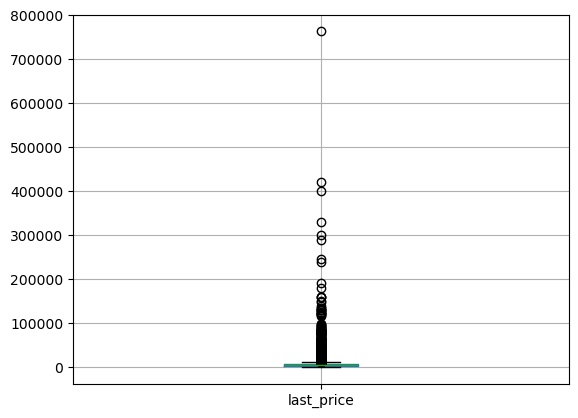

count     21718.000000
mean       6485.387236
std       10797.815067
min          12.000000
25%        3450.000000
50%        4650.000000
75%        6750.000000
max      763000.000000
Name: last_price, dtype: float64


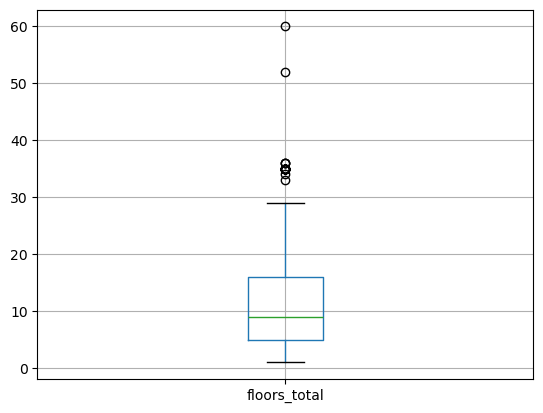

count    21718.000000
mean        10.647435
std          6.568322
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [34]:
bxpl_cols = ['total_area', 'living_area', 'last_price', 'floors_total']
for c in bxpl_cols:
    df.boxplot(column = c)
    plt.show()
    print(df[c].describe())

In [35]:
df[['total_area', 'living_area', 'last_price', 'floors_total']].describe()

,total_area,living_area,last_price,floors_total
count,21718.000000,21718.000000,21718.000000,21718.000000
mean,60.052962,34.447304,6485.387236,10.647435
std,34.610935,21.986372,10797.815067,6.568322
min,12.000000,2.000000,12.000000,1.000000
25%,40.000000,18.600000,3450.000000,5.000000
50%,52.000000,30.000000,4650.000000,9.000000
75%,69.500000,42.300000,6750.000000,16.000000
max,900.000000,409.700000,763000.000000,60.000000


Итак, из полученных данных мы видим, что:

- общая площадь варьируется в вариантах от 12 до 900 м. Сразу же очевидно наличие выбросов. 50% всех квартир имеют площадь от 40 до 69.5

- жилая площадь от 2 до 409.7, причем 50% обявлений имеют площадь от 18,6 до 42,3.

- стоимость квартир от 12 000 р. до 763 000 000 р. 50% значений от 3 450 000 до 6 750 000

- по этажа от 1 до 60 (исключено,  в СПб и ЛО нет домов с такой этажностью). 50% значений от 5 до 16 этажа.

  Удалим выбросы. Значения которые выдаются за рамки ограниченные тремя межквартильными размахами.

In [36]:
threshold = 3
for c in bxpl_cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[c] < q3 + 1.5 * iqr) & (df[c] > q1 - 1.5 * iqr)]



In [37]:
df[['total_area', 'living_area', 'last_price', 'floors_total']].describe()

,total_area,living_area,last_price,floors_total
count,19219.000000,19219.000000,19219.000000,19219.000000
mean,51.768191,29.646105,4677.080233,10.699516
std,16.873051,12.202908,1970.432969,6.518854
min,12.000000,2.000000,12.000000,1.000000
25%,38.600000,18.000000,3300.000000,5.000000
50%,48.000000,29.000000,4350.000000,9.000000
75%,62.000000,38.200000,5800.000000,16.000000
max,113.300000,72.300000,10450.000000,29.000000


### Создание дополнительных параметров

Добавим столбцы с важной информацией:
* цена за квадратный метр;
* день недели публикации объявления (0-понедельник, 1-вторни и т.д.);
* месяц публикации объявления;
* год;
* тип этажа квартиры (значения "первый", "последний", "другой");
* расстояние доцентра в километрах.

In [38]:
#Расчитываем и добавляем стоимость квадратного метра
df['price_metr'] = df['last_price'] / df['total_area']
df['price_metr'] =df['price_metr'].astype(int)

#Добавлем столбец с информацией о дне недели, когда был опубликован пост
df['weekday_exposition'] = (
    pd.to_datetime(df['first_day_exposition'], format=('%Y-%m-%dT%H:%M:%S'))
                   .dt.weekday
)

#Добавляем информацию о месяце публикации
df['month_exposition'] = (
    pd.to_datetime(df['first_day_exposition'], format=('%Y-%m-%dT%H:%M:%S'))
                   .dt.month
)
#Добавляем информацию о годе публикации
df['year_exposition'] = (
    pd.to_datetime(df['first_day_exposition'], format=('%Y-%m-%dT%H:%M:%S'))
                   .dt.year
)
    
#добавляем информацию о типе этажа 
#для этого пропищем функцию, которая сравнит конкретный этаж с этажностью дома и вернет категорию в зависимости от расположения
def fltype(row):
    
    floor = row['floor']
    floors_total  = row['floors_total']
    
    if floor == 1:
        return 'первый'
    
    if floor == floors_total:
        return 'последний'
    
    return 'другое'

df['floor_type'] = df.apply(fltype, axis=1)

#Добавляем информацию о расстоянии до центра города в километрах
df['centers_nearest_km'] = round((df['cityCenters_nearest'] / 1000) ,0)

df.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,airports_nearest,price_metr,weekday_exposition,month_exposition,year_exposition,floor_type,centers_nearest_km
1,7,3350,40.40,2018-12-04T00:00:00,1,2.730849,11,18.60,1,False,...,0.0,NaN,81.0,12817.0,82,1,12,2018,первый,19.0
2,10,5196,56.00,2015-08-20T00:00:00,2,2.730849,5,34.30,4,False,...,2.0,574.0,558.0,21741.0,92,3,8,2015,другое,14.0
4,2,10000,100.00,2018-06-19T00:00:00,2,3.030000,14,32.00,13,False,...,1.0,48.0,121.0,31856.0,100,1,6,2018,другое,8.0
5,10,2890,30.40,2018-09-10T00:00:00,1,2.730849,12,14.40,5,False,...,NaN,NaN,55.0,NaN,95,0,9,2018,другое,NaN
6,6,3700,37.30,2017-11-02T00:00:00,1,2.730849,26,10.60,6,False,...,0.0,NaN,155.0,52996.0,99,3,11,2017,другое,19.0
8,20,2900,33.16,2018-05-23T00:00:00,1,2.730849,27,15.43,26,False,...,NaN,NaN,189.0,NaN,87,2,5,2018,другое,NaN
9,18,5400,61.00,2017-02-26T00:00:00,3,2.500000,9,43.60,7,False,...,0.0,NaN,289.0,50898.0,88,6,2,2017,другое,15.0
10,5,5050,39.60,2017-11-16T00:00:00,1,2.670000,12,20.30,3,False,...,2.0,553.0,137.0,38357.0,127,3,11,2017,другое,14.0
11,9,3300,44.00,2018-08-27T00:00:00,2,2.730849,5,31.00,4,False,...,0.0,NaN,7.0,48252.0,75,0,8,2018,другое,52.0
12,10,3890,54.00,2016-06-30T00:00:00,2,2.730849,5,30.00,5,False,...,NaN,NaN,90.0,NaN,72,3,6,2016,последний,NaN


Выполнены задачи поставленные в предыдущем пункте. На выходе получаем от фильтрованный датафрейм с чистыми данными и дополненный необходимой для анализа информацией.

***********
**ПРОМЕЖУТОЧНЫЙ ВЫВОД**

На данном этапе работы мы привели наши данные в более корректный для аналитики вид:

- **Обработка пропусков**:

   - Заменили пропуски в is_apartment на отрицательные значения. Тем самым изменив формат столбца на bool
   - Заменили пропуски в balcony на значение 0
   - ceiling_height, удалили выбросы, на основании обновленных данных рассчитали среднее и заполнили этим значением пропуски.
   - kitchen_area, рассмотрели данные с пропусками, они составляют 10%. Проверили гипотезу о том, что отсутвие этой информации касается квартир студий. Она не была подтверждена. Чтобы не терять многда данных для исследований, заменили пропуски средним значением.
   - cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest
 
        Было выявлено одинаковое количество пропусков (5507) в графах cityCenters_nearest, parks_nearest, ponds_nearest, airports_nearest. Скорее всего это связано с ошибкой выгрузки картографических данных. Данную информацию необходимо передать разработчикам.
     
        Так же часть пропусков в графах parks_nearest, ponds_nearest, вызвана тем, что парков и озер поблизости нет. Заменять ничем не будем, чтобы не нарушить статитстических значений.
     
        Часть пропусков в графе airports_nearest получилось заменить. Это коснулось объвлений,  квартиры которых были из ЛО. Мы вычислили медианное расстояние от квартир из конкретного населенного пункта до аэропорта. И заменили пропуски во всех объявлениях из этого пункта этим значением.
     
  - пропуски в living_area составили 8%. Эти объекты мы удалили.
  - пропуски в flors_total составили еньше одного процента, эти объекты мы тоже удалили.
 
- **Работа с дубликатами**

  Провели работу с явными и неявными дубликатами. Для этого привели все названия населенных пунктов в нижний регистр. Заменили все "посёлки" на "послеки". Это привело к тому, что количество уникальных наименований уменьшилось с 349 до 315. После провели проверку на дубликаты, их нет.

- Изменили **тип данных** в 'floors_total', 'balcony' на целочисленный.

- **Единицы измерения**

  Изменили формат цены с рублей на тыс. Так как многочисленные цифры сложнее воспрнимаются.

- **Работа с выбросами**

  Проанализироали разброс параметров в данных о'total_area', 'living_area', 'last_price', 'floors_total'.
  - общая площадь варьируется в вариантах от 12 до 900 м. Сразу же очевидно наличие выбросов. 50% всех квартир имеют площадь от 40 до 69.5
  - жилая площадь от 2 до 409.7, причем 50% обявлений имеют площадь от 18,6 до 42,3.
  - стоимость квартир от 12 000 р. до 763 000 000 р. 50% значений от 3 450 000 до 6 750 000
  - по этажа от 1 до 60 (исключено,  в СПб и ЛО нет домов с такой этажностью). 50% значений от 5 до 16 этажа.
 Удалили выбросы.

- **Новые параметры**

Добавили столбцы сновыми параметрами.

  - цена за квадратный метр  
  - день недели публикации объявления (0-понедельник, 1-вторни и т.д.)
  - месяц публикации объявления
  - год
  - тип этажа квартиры (значения "первый", "последний", "другой")
  - расстояние до центра в километрах

## Исследовательский анализ данных

### Общая площадь

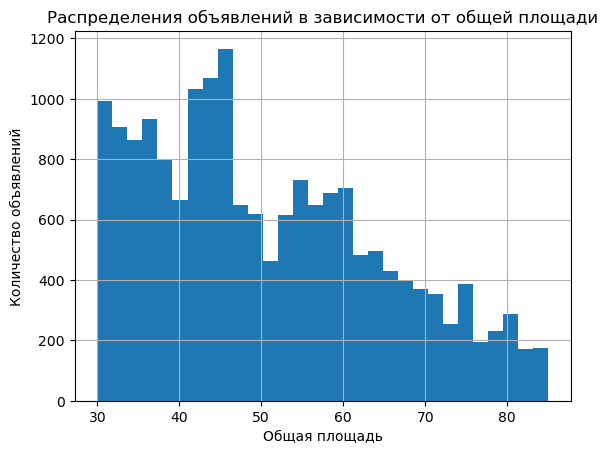

In [39]:
df['total_area'].hist(bins=30, range = (30, 85));
plt.title('Распределения объявлений в зависимости от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')
plt.show()

Самые ходовые, это квартиры площадью 41-46 кв.м.
Так же пользуются популярность метражи 34-39, 52-61 м.

### Жилая площадь.

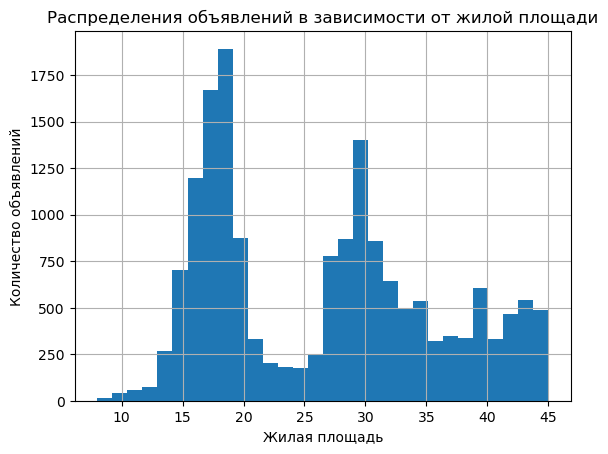

In [40]:
df['living_area'].hist(bins=30, range = (8, 45))
plt.title('Распределения объявлений в зависимости от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений');

Самые продаваемые, это квартиры с жилой площадью от 15 до 19 м, второй пик приходится на квартиры с жилой площадью 26-32 м.

### Площадь кухни.

Для корректного анализа нужно исключить квартиры со свободной планировкой студии. А так же исключим пропуски.


count    19219.000000
mean         9.382313
std          3.498977
min          1.300000
25%          7.000000
50%          9.000000
75%         10.820000
max         50.000000
Name: kitchen_area, dtype: float64

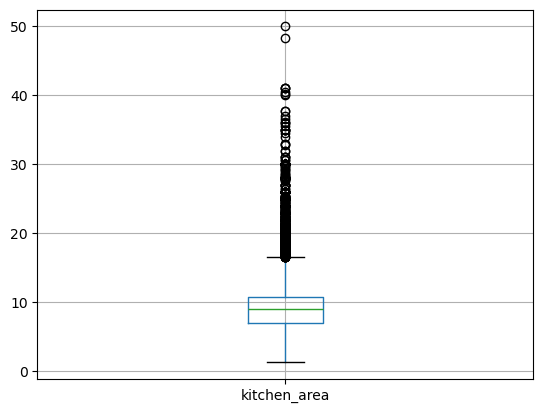

In [41]:
(
    df.dropna(subset = ['kitchen_area'])
    .query('open_plan == False or studio == False')
    .boxplot(column = ['kitchen_area'])
)    
df['kitchen_area'].describe()

Минимальное значение площади кухни 1м. Слишком грустно и не похоже на правду. Скорее всегго связано с некорректным вводом данных.
Кроме того, согласно требованиям СП 54.13330.2011 площадь кухня должна иметь площадь не менее восьми квадратных метров, в то же время для однокомнатных квартир существуют минимальные требования по площади кухни в шесть квадратных метров.
Метраж кухонь продаваемых квартир доходит 112м, похоже на выбросы. Отбросим их.
Соотвественно, для анализа оставим данные в которых площадь кухни 6-40 м.

In [42]:
df_kitch = df.query('6 <= kitchen_area <= 40')

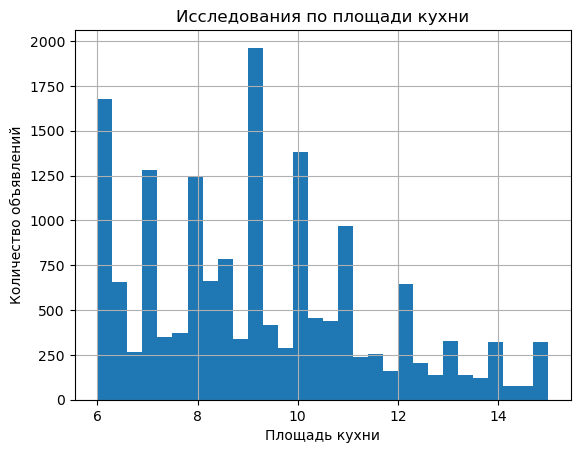

In [43]:
df_kitch['kitchen_area'].hist(bins=30, range = (6, 15))
plt.title('Исследования по площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений');

Самые часто встречаемые значения площади кухни 6-12 м.

### Количество комнат.

Рассмотрим какие именно значение количества комнат есть в нашем отфильтрованном датафрейме.

In [44]:
df['rooms'].unique()

array([1, 2, 3, 4, 0, 5, 6])

Количество комнат в объявлениях варьируется от 1 до 6. Изучим поподробнее.

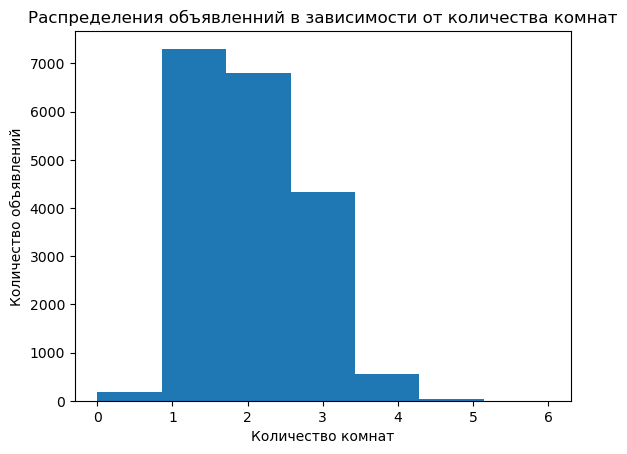

In [45]:
plt.hist(df['rooms'], bins=7)
plt.title('Распределения объявленний в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show();

Самые продаваемые это 1 и 2-комнатные квартиры, около 7000-6000 объявлений. 3-комнатных квартир значительно меньше, около 6000 обявлений. 4-х комнатных квартир чуть меньше 1000. Пяти- и шестикомнатные квартиры самые редкие варианты.

### Высота потолков



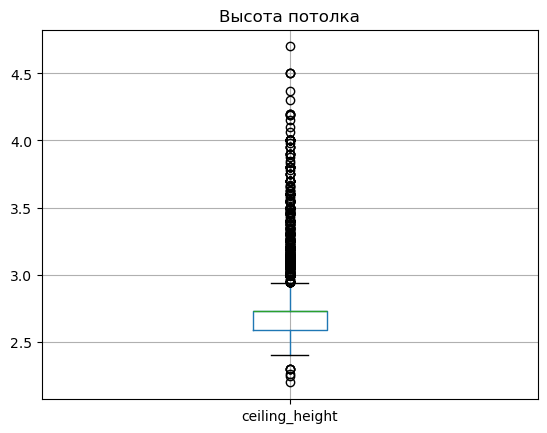

In [46]:
df.boxplot(column = 'ceiling_height')
plt.title('Высота потолка');

In [47]:
df['ceiling_height'].describe()

count    19219.000000
mean         2.698047
std          0.175398
min          2.200000
25%          2.590000
50%          2.730849
75%          2.730849
max          4.700000
Name: ceiling_height, dtype: float64

Потолки в продаваемых квартирах в основном от 2,58 до 2,73 м.


### Этаж квартиры.

In [48]:
df['floor'].describe()

count    19219.000000
mean         5.853166
std          4.850387
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

Продаваемые квартиры располагаются на 1-27 этажах.

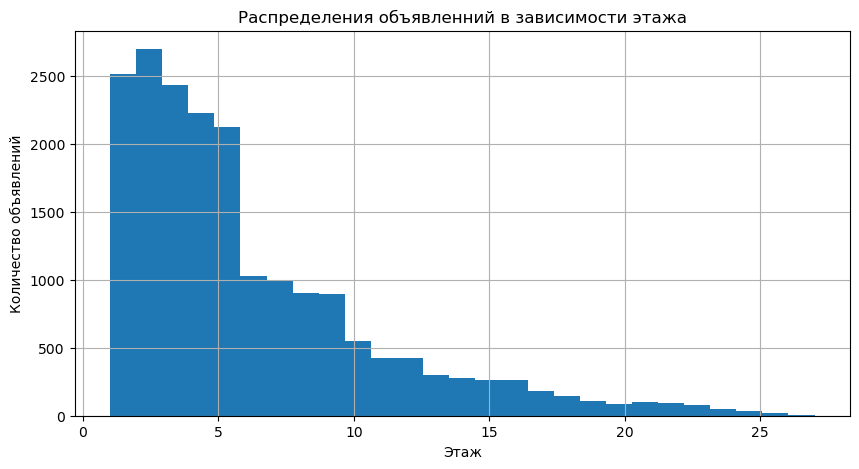

In [49]:
df['floor'].hist(bins=27, figsize = (10, 5))
plt.title('Распределения объявленний в зависимости этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show();

Большая часть продаваемых квартир располагается на 1-5 этажах.

### Тип этажа квартиры.

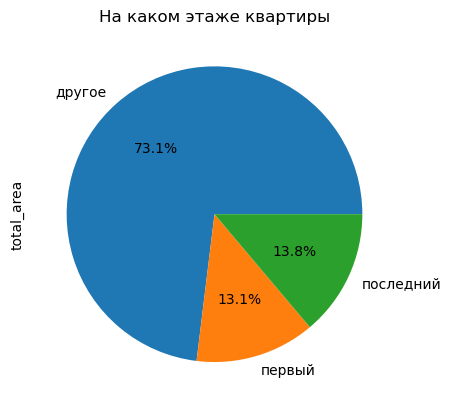

In [50]:
df.groupby('floor_type')['total_area'].count().plot(kind='pie', y='value_column', autopct='%1.1f%%')
plt.title('На каком этаже квартиры');

На первых и последних этажах располагается по 13% продаваемых квартир. 

### Общее количество этажей в доме.

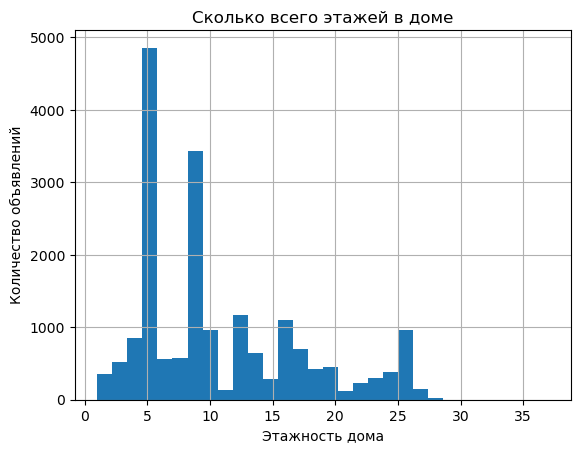

In [51]:
df['floors_total'].hist(bins=30, range=(1, 37))
plt.title('Сколько всего этажей в доме')
plt.xlabel('Этажность дома')
plt.ylabel('Количество объявлений')
plt.show()

Самые продаваемые, это квартиры в пяти- и десятиэтажных домах. 

### Расстояние до центра города в метрах.

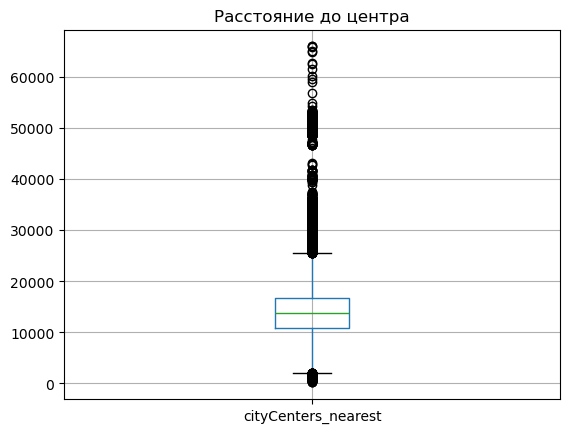

In [52]:
df.boxplot(column = 'cityCenters_nearest')
df['cityCenters_nearest'].describe()
plt.title('Расстояние до центра');

Большинство квартир которые продаются, нахлдятся на росстояние от 10 до 25 км, есть и на расстояние около 60 км, но это не частое явление. Рассмотрим подробнее квартиры находящиеся на расстоянии до 30 км от центра.

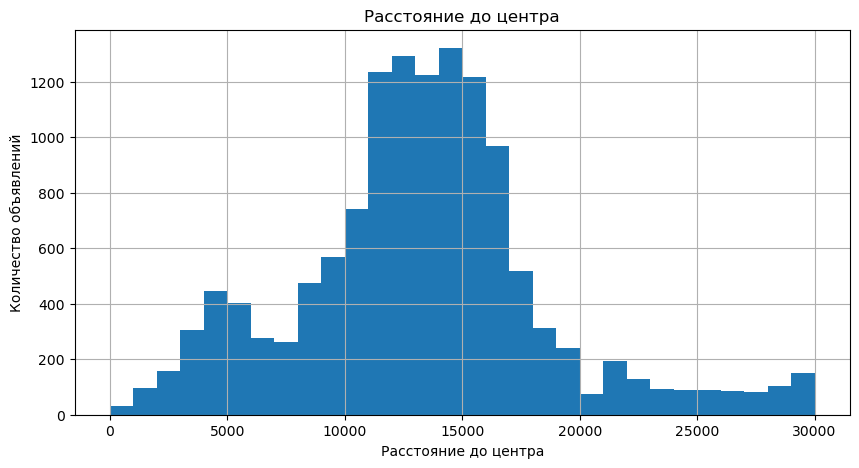

In [53]:
df['cityCenters_nearest'].hist(bins=30, range=(0, 30000), figsize = (10, 5))
plt.title('Расстояние до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество объявлений')
plt.show();

Большинство продаваемых квартир расположены на расстоянии 12-19 км от центра.
Так же небольшой пик распределения в объявлениях квартир на расстоянии 5-6 км.

### Растояние до ближайшего аэропорта.

count    14484.000000
mean     29083.637497
std      13124.274614
min          0.000000
25%      18012.000000
50%      27310.500000
75%      37901.500000
max      84869.000000
Name: airports_nearest, dtype: float64

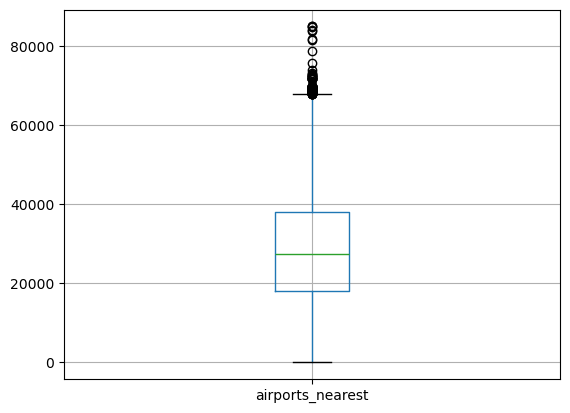

In [54]:
df.boxplot(column = 'airports_nearest')
df['airports_nearest'].describe()

Расстояние до аэропорта варьируется в диапазон от 0 (меньше километра) до 85 м. Основная масса значений приходится на диапазон от 18 до 37 км.

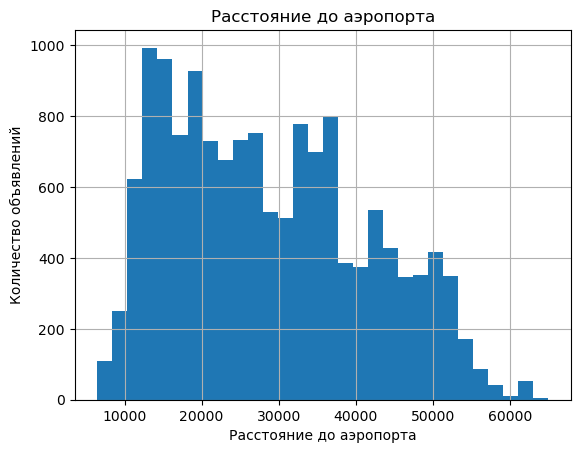

In [55]:
df['airports_nearest'].hist(bins=30, range = (6450, 65000))
plt.title('Расстояние до аэропорта')
plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Количество объявлений')
plt.show();

Большинство продаваемых квартир находятся на расстояние от 10 до 28 км до аэропорта.

### Расстояние до ближайшего парка.

count    5923.000000
mean      485.478980
std       319.324216
min         1.000000
25%       290.000000
50%       456.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

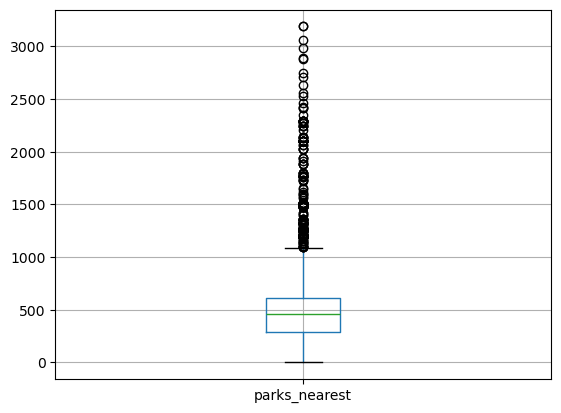

In [56]:
df.boxplot(column = 'parks_nearest')
df['parks_nearest'].describe()

Из 8 тыс продаваемых квартир находятс на расстояние от 1 м до 1 км.

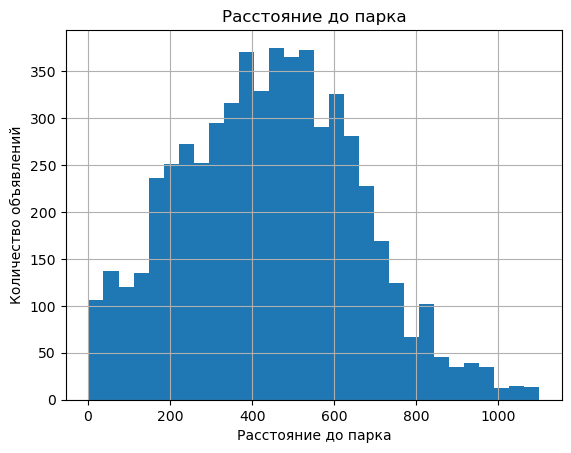

In [57]:
df['parks_nearest'].hist(bins=30, range = (1, 1100))
plt.title('Расстояние до парка')
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество объявлений')
plt.show();

Большинство из них на расстояние от 180  до 630 м. Пик продаж 420-520 м.

### День и месяц публикации обьявления.

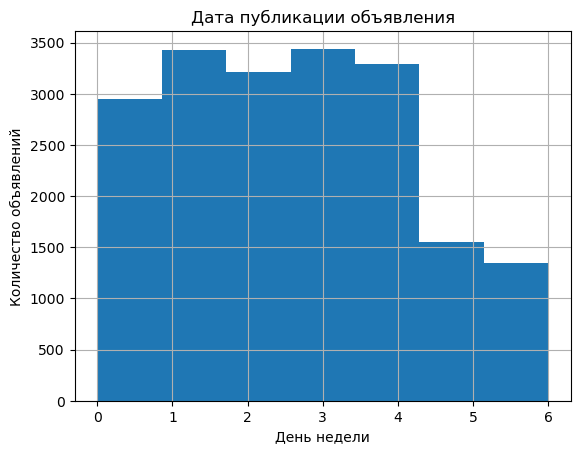

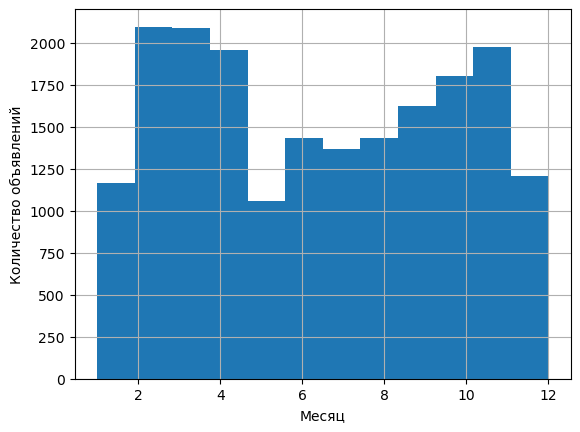

In [58]:
df['weekday_exposition'].hist(bins = 7)
plt.title('Дата публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.show();
df['month_exposition'].hist(bins = 12)
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.show();

В будние дни размещается большинство объявлений. В пн около 3500 публикаций. Со вт по пт публикуется от 4000 объявлений ежедневно. В выходные приблизительно в 2 раза меньше. Около 2000 в сб и 1700 публикаций соотвественно.

В январе квартиры почти не продают. Сезон продаж начинается в феврале. Самый горячий сезон , это весна. Самый тихий месяц июнь, количество объявлений размещенных в этом месяце падает в 2 раза. Июль, август, самый стабильный средний период. Сентябрь, октябрь, ноябрь, уровень активности опять начинает нарастать. Ноябрь второй пиковый период. В декабре, все опять успокаивается.

Соответственно самые активные дни,это будние в марте.

### Длительность размещения обявления.

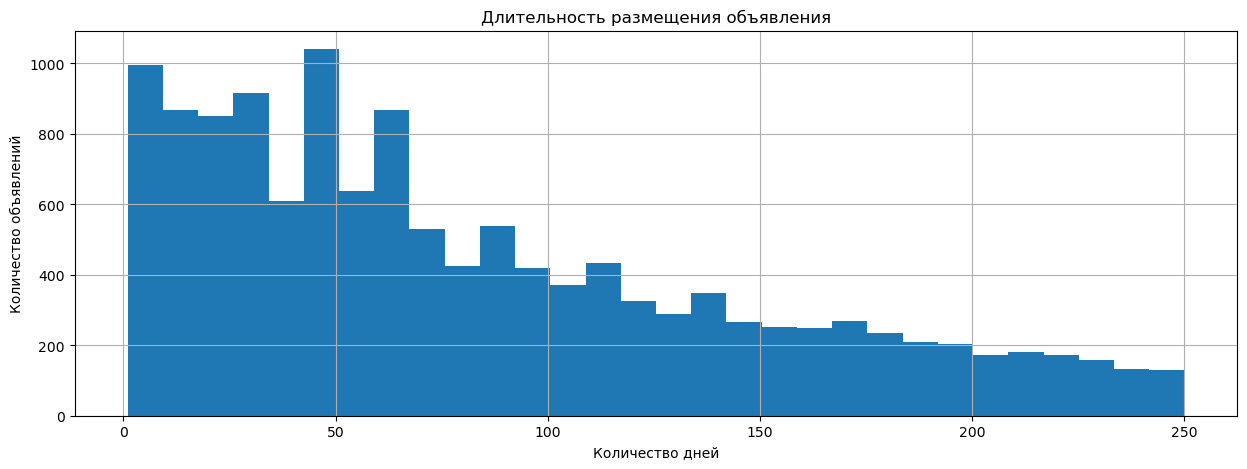

In [59]:
df['days_exposition'].hist(bins= 30, range=(1, 250), figsize = (15, 5))
plt.title('Длительность размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show();

In [60]:
 df['days_exposition'].describe()

count    16861.000000
mean       174.394105
std        209.209451
min          1.000000
25%         42.000000
50%         95.000000
75%        224.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднеарифмитечское значение этого показателя 180, в то в ремя как медианное 95. Это говорит нам о наличии выбросов, экстремально долгих продажах квартир.

Минимальная длительность размещения объяявления 1 день. То есть некоторые квартиры улетали сиюсекундно. 
Есть и объявления которые были активны более 4 лет.

Продажи которые произошли менее чем за 45 дней, можно считать быстрыми.

продажи которые длилились более 230 дней (более 7 с половиной месяцев) можно считать длительными.

Чаще всего квартиры продаются до 60 дней. Есть 2 ярко выреженных пика продаж. Рассмотрим детальнее график в диапозоне от 45 дней 100.

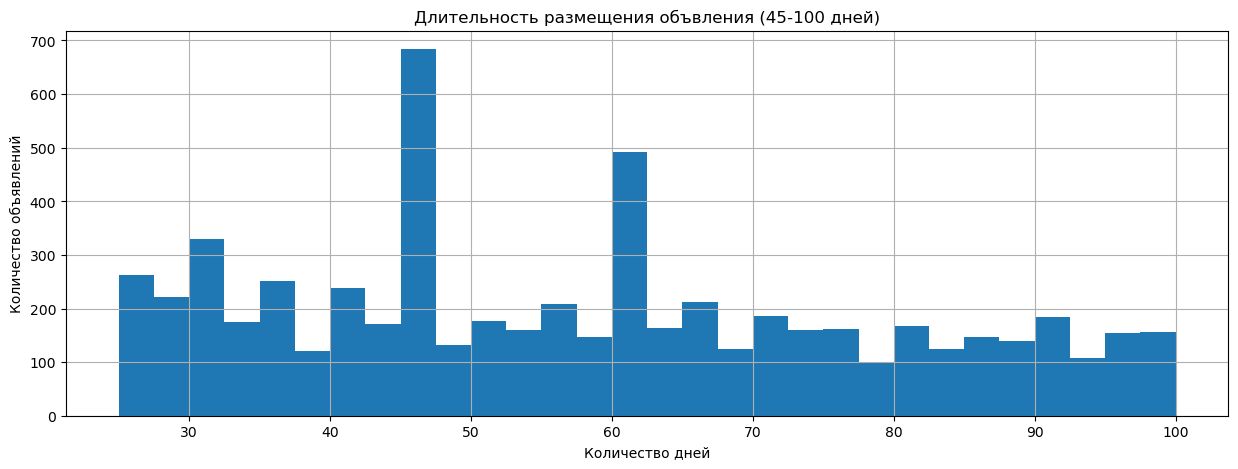

In [61]:
df['days_exposition'].describe()
df['days_exposition'].hist(bins= 30, range=(25, 100), figsize = (15, 5))
plt.title('Длительность размещения объвления (45-100 дней)')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show();

Есть пики в 45 дней, 60 и 90.

Очень специфические числа. Скорее всего это связано с алгоритмами работы ресурса с обявлениями. Вероятно платформа убирает в обьвления раз в 45 ил 60 дней, если пользователь его не продлил.

### ЦЕНА ОБЪЕКТА.


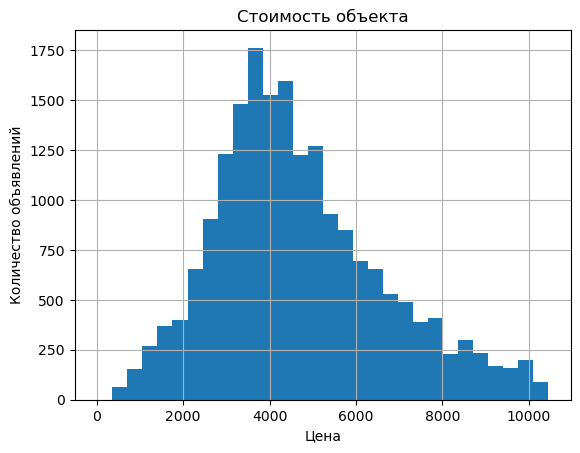

In [62]:
df['last_price'].hist(bins=30)
plt.title('Стоимость объекта')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show();

Большинство продаваемых квартир, стоили до 6 000 000 рублей.

Изучим повнимательнее вопрос ценообразования.

**Зависимость цены от города.**

Очевидно, что цены на жилье от города к городу, очень отличаются. Посмотрим среднее значение квадратного метра в в 10 городах с самым большим количество продаж.

Сначала изучим в каких городах квартиры продаются чаще всего.

In [63]:
df_cities = df.pivot_table(
    index = 'locality_name',
    values = 'price_metr',
    aggfunc = ['count', 'median'])
df_cities.columns = ['количество объявлений', 'стоимость квадратного метра, тыс.руб.']
df_cities = df_cities.sort_values(by = 'количество объявлений', ascending=False)
df_cities['стоимость квадратного метра, тыс.руб.'] = df_cities['стоимость квадратного метра, тыс.руб.'].round(0)
df_cities.sort_values('стоимость квадратного метра, тыс.руб.').head()

,количество объявлений,"стоимость квадратного метра, тыс.руб."
locality_name,,
деревня старополье,1,10.0
поселок тёсово-4,1,12.0
поселок совхозный,1,12.0
деревня выскатка,2,12.0
деревня малая романовка,1,12.0


В наших данных больше всего объявлений из Санкт-Петербурга - 11 452, Мурино - 404, Кудрово 359, Шушары - 340 и Всеволожск - 286.

Далее идет самый туристический город ЛО, Пушкин - 369.

После по 300 с небольшим Колпино, Паргалово и Гатчина.

В Выборге уже значительно меньше 237.

In [64]:
print('Города с самой высокой стоимостью квадратного метра:')
print(df_cities['стоимость квадратного метра, тыс.руб.'].sort_values(ascending=False).head(15))

Города с самой высокой стоимостью квадратного метра:
locality_name
санкт-петербург                     101.0
кудрово                             100.0
пушкин                               98.0
зеленогорск                          98.0
сестрорецк                           98.0
деревня кудрово                      92.0
поселок парголово                    91.0
деревня мистолово                    90.0
мурино                               89.0
нет данных                           86.0
поселок мурино                       86.0
поселок стрельна                     86.0
павловск                             85.0
поселок станции корнево              82.0
садовое товарищество новая ропша     81.0
Name: стоимость квадратного метра, тыс.руб., dtype: float64


Самые дорогие квартиры находятся ожидаемо в Санкт-Петербурге (101 тыс за кв.м.), Кудрово(100), Зеленогорске (98), Пушкине (98) и Сестрорецке(98).

In [65]:
print('Города с самой низкой стоимостью квадратного метра:')
print(df_cities['стоимость квадратного метра, тыс.руб.'].sort_values().head(15))

Города с самой низкой стоимостью квадратного метра:
locality_name
деревня старополье                    10.0
поселок тёсово-4                      12.0
поселок совхозный                     12.0
деревня выскатка                      12.0
деревня малая романовка               12.0
деревня ям-тесово                     12.0
деревня сижно                         13.0
поселок городского типа ефимовский    14.0
поселок житково                       14.0
поселок станции свирь                 15.0
деревня фалилеево                     16.0
деревня чудской бор                   16.0
поселок шугозеро                      16.0
поселок володарское                   16.0
поселок почап                         16.0
Name: стоимость квадратного метра, тыс.руб., dtype: float64


Самые бюджетные квартиры Старополье (10 тыс кв.м.)

**Цена и близость к центру.**

Рассмотрим как влияет близость к центру на стоимость. Больше всего объвлений по Санкт-Петербургу, его и изучим. Разделим объявления на 5 категорий в зависимости от близости к центру и сравним медианные значения.

In [66]:
#Сделаем срез в котором будут только обьявления Санкт-Петербурга
df_spb = df.query('locality_name == "санкт-петербург"')
df_spb = df_spb[['centers_nearest_km', 'price_metr']]
#Рассмотрим столбец с информации об удаленности от центра поподробнее
df_spb['centers_nearest_km'].describe()

count    12137.000000
mean        12.363928
std          4.458051
min          0.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         29.000000
Name: centers_nearest_km, dtype: float64

Минимальная удаленность 0, максимальная 29 км.


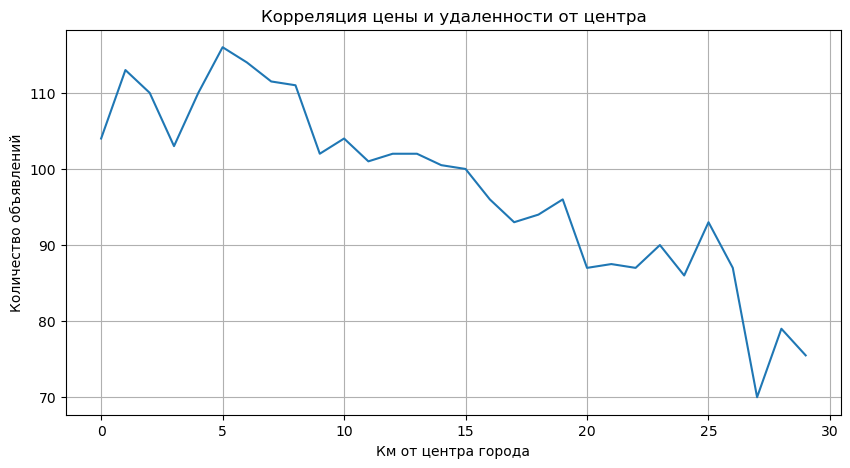

-0.2879363402999391

In [67]:
(
    df_spb.groupby('centers_nearest_km')['price_metr'].median()
    .plot(grid=True,
          figsize=(10, 5))  
) 
plt.title('Корреляция цены и удаленности от центра')
plt.xlabel('Км от центра города')
plt.ylabel('Количество объявлений')
plt.show();
df_spb['price_metr'].corr(df_spb['centers_nearest_km'])


  На граффике, видна отрицательная коррелиция, то есть чем меньше дальность от центра, тем выше стоимость квадртаного метра.

Рассмотри детальнее стоимость квартиры в зависимости от удаленности от центра. для этого значала разобъем все объявления на 5 категорий и рассчитаем медианную стоимость для каждой.

In [68]:
#Пишем функцию которая разобьет наши обявления на категории
def cat_spb(km):

    if km < 6.0:
        return 'до 6 км.'
    
    if 6 <= km < 12:
        return 'от 6 до 12 км.'
    
    if 12 <= km < 18:
       return 'от 12 до 18 км.'
    
    if 18 <= km < 24:
       return 'от 18 до 24 км..'
        
    return 'больше 24 км.'

df_spb['cat'] = df_spb['centers_nearest_km'].apply(cat_spb) 
#Проверим, что вышло
df_spb.head()

,centers_nearest_km,price_metr,cat
2,14.0,92,от 12 до 18 км.
4,8.0,100,от 6 до 12 км.
9,15.0,88,от 12 до 18 км.
10,14.0,127,от 12 до 18 км.
15,14.0,119,от 12 до 18 км.


In [69]:
#Рассчитаем медианы
df_spb.groupby('cat')['price_metr'].median().sort_values(ascending=False)

cat
до 6 км.            110.0
от 6 до 12 км.      105.0
от 12 до 18 км.     100.0
от 18 до 24 км..     91.0
больше 24 км.        90.0
Name: price_metr, dtype: float64

Итого, в зависимости от близости к ценру цена за квадратный метр составляет:

- до 6 км.            110.0
- от 6 до 12 км.      105.0
- от 12 до 18 км.     100.0
- от 18 до 24 км..     91.0
- больше 24 км.        90.0

**Цена и внешние характеристики квартиры.**


Расмотрим подробнее зависимость цены от ряда факторов (общая площадь, жилая площадь, площадь кухни, количества комнат,  типа этажа на котором расположена квартира, даты размещения) на более конкретном срезе квартир Санкт-Петербурга, от 0 до 10 км до центра.  

,total_area,living_area,kitchen_area,rooms,last_price,price_metr
total_area,1.000000,0.899220,0.345420,0.791944,0.720978,-0.436633
living_area,0.899220,1.000000,0.034932,0.861808,0.582446,-0.485476
kitchen_area,0.345420,0.034932,1.000000,0.000255,0.391404,0.056651
rooms,0.791944,0.861808,0.000255,1.000000,0.475379,-0.487637
last_price,0.720978,0.582446,0.391404,0.475379,1.000000,0.266235
price_metr,-0.436633,-0.485476,0.056651,-0.487637,0.266235,1.000000


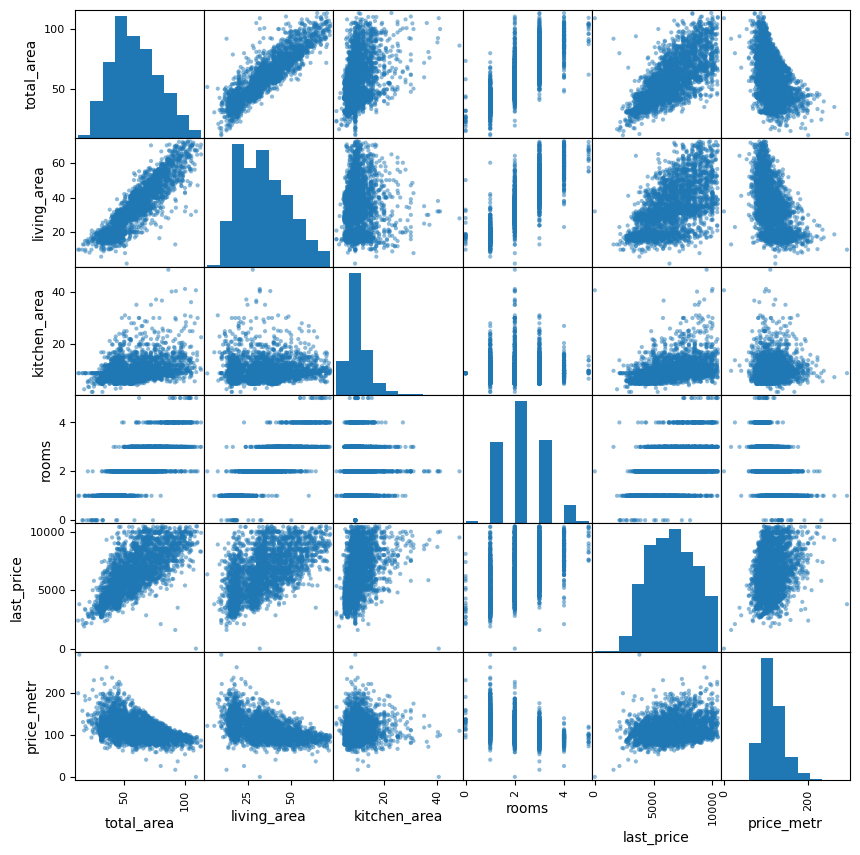

In [70]:
#Делаем срез по интересующему нас интервалу дальности от центра
df_spb_centre = df.query('centers_nearest_km < 10 and locality_name == "санкт-петербург"')
df_spb_centre = df_spb_centre[['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price', 'price_metr']]
pd.plotting.scatter_matrix(df_spb_centre, figsize=(10, 10))
df_spb_centre.corr()

**Цена и количество комнат.**

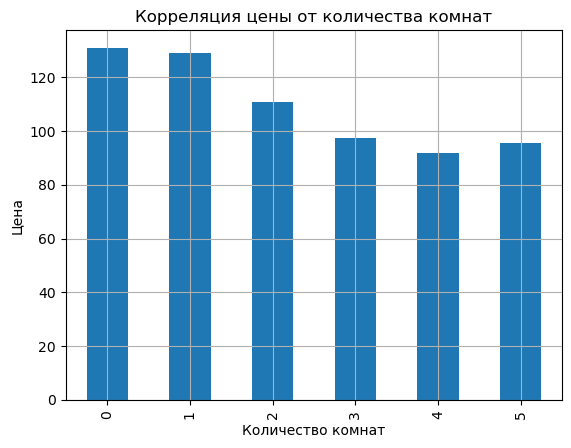

In [71]:
(
    df_spb_centre.groupby('rooms')['price_metr'].median()
    .plot(kind='bar', 
         x='rooms',
         y='price_metr', 
         grid=True)
)
plt.title('Корреляция цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

Чем больше комнат, тем ниже цена за квадратный метр.

**Цена и дата публикации.**

**1)** Рассмотрим взаимосвязь между днями недели и, когда было выложено объявление и ценой. 

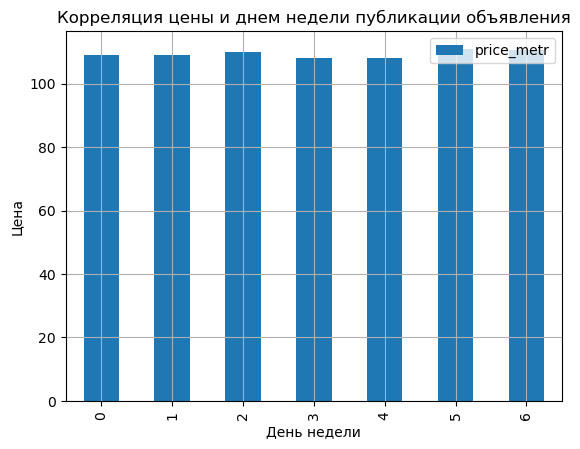

In [72]:
(
    df.query('locality_name == "санкт-петербург" and centers_nearest_km < 10')
    .pivot_table(index='weekday_exposition',
                             values='price_metr',
                             aggfunc='median')
    .plot(kind='bar',   
         grid=True)
)
plt.title('Корреляция цены и днем недели публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

Колебания цены в зависмости от дня недели незначительны.

**2)** Связь между месяцем публикации и ценой.

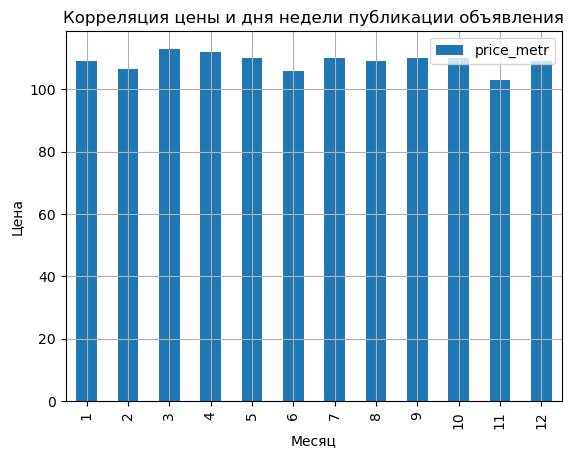

In [73]:
(
    df.query('locality_name == "санкт-петербург" and centers_nearest_km < 10')
    .pivot_table(index='month_exposition',
                             values='price_metr',
                             aggfunc='median',)
    .plot(kind='bar',   
         grid=True)
)
plt.title('Корреляция цены и дня недели публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

Самые низкие цены на квадратный метр в тех объявлениях,   которые были размещены в ноябре. Это может быть связано с тем, что люди хотят закрыть дела и сделки до Нового года и делают небольшой дисконт.

Самые высокие цены на мартовские и сентябрьские квартиры. Здесь скорее ввсего это связано со скачком покупательской активностью. Люди возвращаются из отпусков, кто-то организовывает переезд, связанный с началом учебного года, кто-то обустраивается к началу сезонов. 

**3)** Связь между годом публикации и ценой.

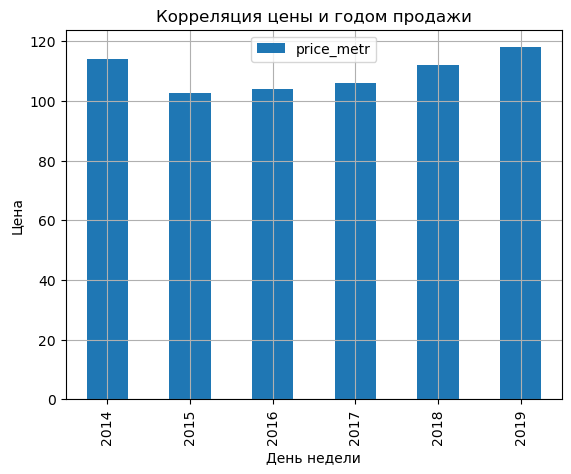

In [74]:
(
    df.query('locality_name == "санкт-петербург" and centers_nearest_km < 10')
    .pivot_table(index='year_exposition',
                             values='price_metr',
                             aggfunc='median')
    .plot(kind='bar',   
         grid=True)
)
plt.title('Корреляция цены и годом продажи')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show();

Очень выделяется 2014-й год, после него идет обвал, и цены идут по нарастающей от года к году.

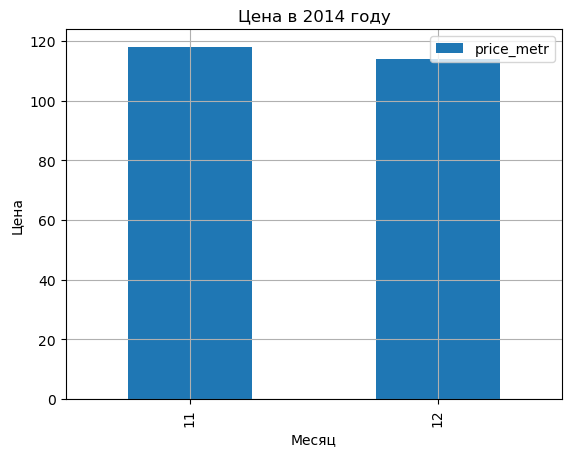

In [75]:
(
    df.query('locality_name == "санкт-петербург" and centers_nearest_km < 10 and year_exposition == 2014')
    .pivot_table(index='month_exposition',
                             values='price_metr',
                             aggfunc='median')
    .plot(kind='bar',   
         grid=True)
)
plt.title('Цена в 2014 году')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show();

Данные представлены всего 2 месяцами, что ограничивает нас в гипотезах.

Скорее всего, это связано с тем, что в 2014 году первый раз ввели антироссийские санкции, курс доллара вырос, а рубль сильно упал. Соответсвенно из-за слабого рубля цены на квартиры сильно поднялись.


Рассмотрим активность рынка по годам. 

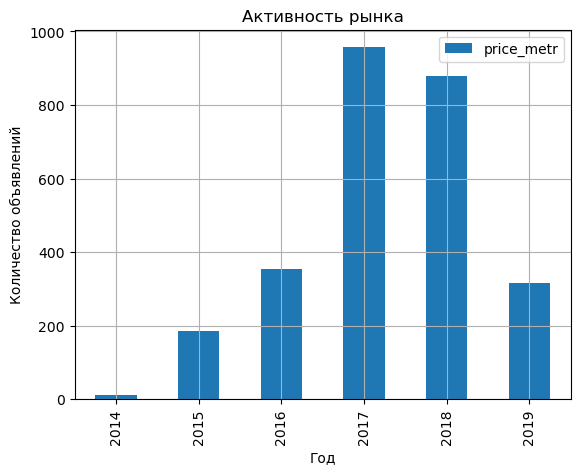

In [76]:
(
    df.query('locality_name == "санкт-петербург" and centers_nearest_km < 10')
    .pivot_table(index='year_exposition',
                             values='price_metr',
                             aggfunc='count')
    .plot(kind='bar',   
         grid=True)
)
plt.title('Активность рынка')
plt.xlabel('Год')
plt.ylabel('Количество объявлений')
plt.show();

После тяжелого 2014-го года, люди меньше покупали квартир, скорее всего это связано  все с тем же сильным падением рубля и инфляцией в стране. В 2017-м году продаж почти в 3 раза больше. Квартиры опять стали покупать чаще. Но очередной првал в 2019-м. Возможно это связано с тем, что предоставлены данные не за весь год.

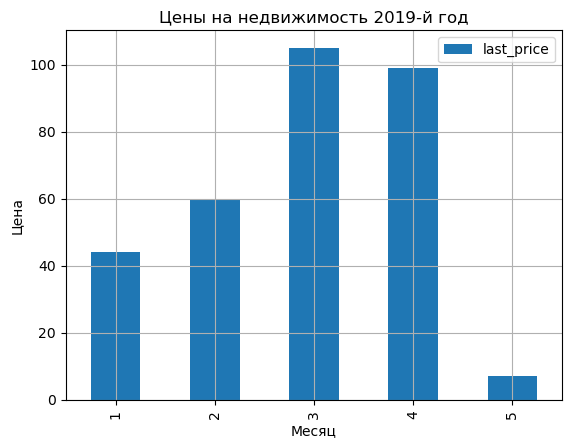

In [77]:
(
    df.query('locality_name == "санкт-петербург" and centers_nearest_km < 10 and year_exposition == 2019')
    .pivot_table(index='month_exposition',
                             values='last_price',
                             aggfunc='count')
    .plot(kind='bar',   
         grid=True)
)
plt.title('Цены на недвижимость 2019-й год')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show();

Так и есть, данные только за первые 5 месяцев. а ведь впереди еще один "горячий" осенний сезон. Можно предположить что в с 2017-го года покупательская способность увеличилась в 2 раза, по сравнению с 2014-2016 ми годами.

**4)** Цена и этаж.

Сравним медианные значения в зависмости от этажа.

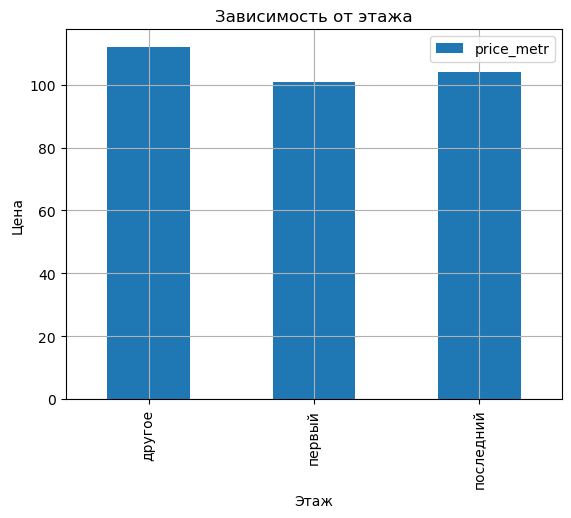

In [78]:
(
    df.query('locality_name == "санкт-петербург" and centers_nearest_km < 10')
    .pivot_table(index='floor_type',
                             values='price_metr',
                             aggfunc='median')
    .plot(kind='bar',   
         grid=True)
)
plt.title('Зависимость от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show();

Квартиры на первых и последних этажах значительно дешевле прочих.

*************
## ОБЩИЙ ВЫВОД

Нам предоставили  данные, которые содержали инфорацию о продажах квартир. Мы наметили план работы с ними.

1. Обзор данных
2. Предобработка данных.
3. Исследовательский анализ.
4. Общий вывод.

**Обзор данных:**   
Получена информация об объявления о прадажах квартир периода декабрь 2014 - май 2018-го года. Данные выгружены корректно. В них содержится инфорация о 23699 объектах недвижимости. 

**Предобработка данных:**

- *Обработка пропусков*:

   - Заменили пропуски в is_apartment на отрицательные значения. Тем самым изменив формат столбца на bool
   - Заменили пропуски в balcony на значение 0
   - ceiling_height, удалили выбросы, на основании обновленных данных рассчитали среднее и заполнили этим значением пропуски.
   - kitchen_area, рассмотрели данные с пропусками, они составляют 10%. Проверили гипотезу о том, что отсутвие этой информации касается квартир студий. Она не была подтверждена. Чтобы не терять многда данных для исследований, заменили пропуски средним значением.
   - cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest
 
        Было выявлено одинаковое количество пропусков (5507) в графах cityCenters_nearest, parks_nearest, ponds_nearest, airports_nearest. Скорее всего это связано с ошибкой выгрузки картографических данных. Данную информацию необходимо передать разработчикам.
     
        Так же часть пропусков в графах parks_nearest, ponds_nearest, вызвана тем, что парков и озер поблизости нет. Заменять ничем не будем, чтобы не нарушить статитстических значений.
     
        Часть пропусков в графе airports_nearest получилось заменить. Это коснулось объвлений,  квартиры которых были из ЛО. Мы вычислили медианное расстояние от квартир из конкретного населенного пункта до аэропорта. И заменили пропуски во всех объявлениях из этого пункта этим значением.
     
  - пропуски в living_area составили 8%. Эти объекты мы удалили.
  - пропуски в flors_total составили еньше одного процента, эти объекты мы тоже удалили.
 
- *Работа с дубликатами*

  Провели работу с явными и неявными дубликатами. Для этого привели все названия населенных пунктов в нижний регистр. Заменили все "посёлки" на "послеки". Это привело к тому, что количество уникальных наименований уменьшилось с 349 до 315. После провели проверку на дубликаты, их нет.

- Изменили *тип данных* в 'floors_total', 'balcony' на целочисленный.

- *Единицы измерения*

  Изменили формат цены с рублей на тыс. Так как многочисленные цифры сложнее воспрнимаются.

- *Работа с выбросами*

  Проанализироали разброс параметров в данных о'total_area', 'living_area', 'last_price', 'floors_total'.
  - общая площадь варьируется в вариантах от 12 до 900 м. Сразу же очевидно наличие выбросов. 50% всех квартир имеют площадь от 40 до 69.5
  - жилая площадь от 2 до 409.7, причем 50% обявлений имеют площадь от 18,6 до 42,3.
  - стоимость квартир от 12 000 р. до 763 000 000 р. 50% значений от 3 450 000 до 6 750 000
  - по этажа от 1 до 60 (исключено,  в СПб и ЛО нет домов с такой этажностью). 50% значений от 5 до 16 этажа.
 Удалили выбросы.

- *Новые параметры*

 Добавили столбцы сновыми параметрами.
  - цена за квадратный метр  
  - день недели публикации объявления (0-понедельник, 1-вторни и т.д.)
  - месяц публикации объявления
  - год
  - тип этажа квартиры (значения "первый", "последний", "другой")
  - расстояние до центра в километрах

**Исследовательский анализ:**

Большинство продаваемых квартир, стоили до 6 000 000 рублей.

В наших данных больше всего объявлений из Санкт-Петербурга - 11 452, Мурино - 404, Кудрово 359, Шушары - 340 и Всеволожск - 286.
Далее идет самый туристический город ЛО, Пушкин - 369.
После по 300 с небольшим Колпино, Паргалово и Гатчина.
В Выборге уже значительно меньше 237.

* Самые дорогие квартиры находятся ожидаемо в Санкт-Петербурге (101 тыс за кв.м.), Кудрово(100), Зеленогорске (98), Пушкине (98) и Сестрорецке(98). Самые бюджетные квартиры в Старополье (10 тыс кв.м.)
 
* Чем ближе к центру, тем стоимость квадратного метра выше.

   - до 6 км.            - 110 тыс. руб.
   - от 6 до 12 км.      - 105 тыс. руб.
   - от 12 до 18 км.     - 100 тыс. руб.
   - от 18 до 24 км.     - 91 тыс. руб.
   - больше 24 км.       - 90 тыс. руб.

* По внешним характеристикам.
 
 - Корелляция между стоимостью квадратного метра площадью, отрицательная. То есть чем больше жилая и общая площадь, а следовательно и цена объекта, тем ниже цена квадратного метра.
 - Чем больше комнат, тем ниже цена за квадратный метр.
 - Взаимозависимость между жилой площадью, площадью кухни средняя. Соттвественно чем больше площадь, тем выше цена. 
 - квартиры на первом и последнем этаже дешевле, чем на остальных.

* Зависмость от даты публикации.

  - Связи между днем недели публикации и цены нет. 
  - Самые низкие цены на квадратный метр в тех объявлениях,   которые были размещены в ноябре. Это может быть связано с тем, что люди хотят закрыть дела и сделки до Нового года и делают небольшой дисконт.

Самые высокие цены на мартовские и сентябрьские квартиры. Здесь скорее ввсего это связано со скачком покупательской активностью. Люди возвращаются из отпусков, кто-то организовывает переезд, связанный с началом учебного года, кто-то обустраивается к началу сезонов
  
* Изменение цен на квартиры по годам в связи в экономическими факторами.
 
 В 2014-м году был кризис вызванный первой волной антиросссийских санкций. В связи с этим рубль упал и стоимость  квартир взлетела. В 2015-ом и 2016-ом снизилась покупательская активность, вследствии все того же кризиса и инфляции. С 2017 года рынок восстанавливается, спрос на квартиры стал расти, а вместе с ним и цена.
  
 